# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
diabetes_data = load_diabetes()
df_X = diabetes_data.data
df_y = diabetes_data.target

In [3]:
print(type(df_X))
print(type(df_y))
print(df_X.shape)
print(df_y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(442, 10)
(442,)


In [34]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [25]:
ddf = pd.DataFrame(data  = df_X, columns = diabetes_data.feature_names)

In [26]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [30]:
ddf.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


In [31]:
ddf['target'] = diabetes_data.target

In [33]:
ddf.corr().style.background_gradient(cmap = 'YlGn')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


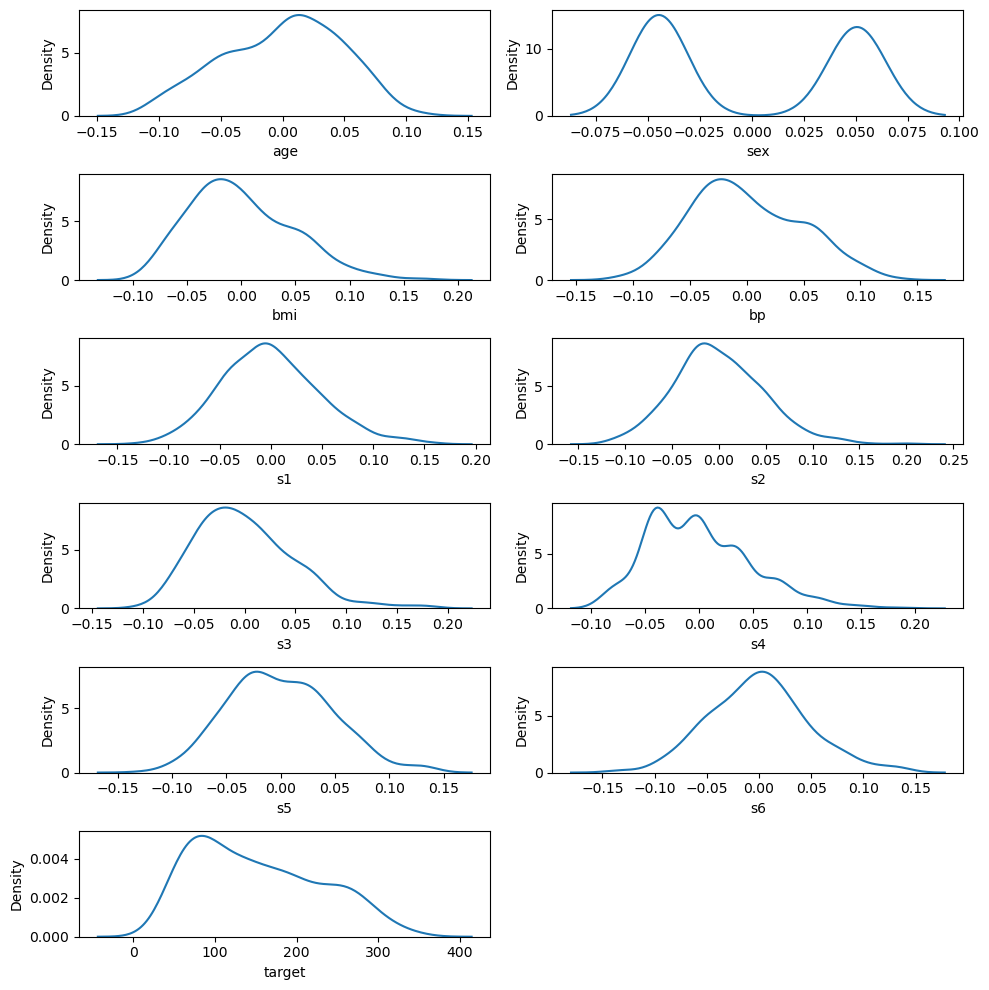

In [38]:
fig = plt.figure(figsize = (10,10))
for i, col in enumerate(ddf.columns) :
    ax = fig.add_subplot(6,2,i+1)
    sns.kdeplot(data=ddf,x=col)
plt.tight_layout()
plt.show()    

## (2) 모델에 입력할 데이터 X 준비하기

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
df_X = np.array(df_X)
print(df_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


## (3) 모델에 예측할 데이터 y 준비하기

- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
df_X = np.array(df_X)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(df_X)
df_X = scaler.transform(df_X)

In [108]:
df_X

array([[0.66666667, 1.        , 0.58264463, ..., 0.28208745, 0.562217  ,
        0.43939394],
       [0.48333333, 0.        , 0.14876033, ..., 0.14104372, 0.22243673,
        0.16666667],
       [0.88333333, 1.        , 0.51652893, ..., 0.28208745, 0.49657763,
        0.40909091],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.24964739, 0.30503001,
        0.56060606],
       [0.28333333, 0.        , 0.49586777, ..., 0.39351199, 0.65702552,
        0.40909091],
       [0.28333333, 0.        , 0.0661157 , ..., 0.14104372, 0.46930394,
        0.51515152]])

## (4) train 데이터와 test 데이터로 분리하기

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [54]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state =23)

print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(309, 10) (133, 10)
(309,) (133,)


## (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [124]:
np.random.seed(0)
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
0.7917250380826646


In [125]:
def regression_model(X,W,b) :
    y = np.dot(X,W) + b
    return y

In [126]:
y_hat = regression_model(X_train, W,b)

## (6) 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의해주세요.

In [127]:
def MSE(a,b):
    MSE = ((a - b) ** 2).mean()
    return MSE

In [152]:
def RMSE(mse):
    return mse**0.5

In [128]:
MSE(y_hat,y_train)

27251.158719222138

## (7) 기울기를 구하는 gradient 함수 구현하기

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [129]:
def gradient_descent(X,predicted, y) :
    N = len(X)
    dW = 1/N * 2 * X.T.dot(predicted-y)
    db = 2 * (predicted - y).mean()
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [130]:
LearningRate = 0.01

## (9) 모델 학습하기

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [131]:
epoch = 2000
losses = []

for i in range(epoch+1) :
    prediction = regression_model(X_train, W, b)
    loss = MSE(y_train ,prediction)
    dW, db = gradient_descent(X_train, prediction, y_train)
    W -= LearningRate * dW
    b -= LearningRate * db
    losses.append(loss)
    
    if i % 100 == 0 :
        print(f'for epoch {i}, loss : {loss}')

for epoch 0, loss : 27251.158719222138
for epoch 100, loss : 4572.186640612103
for epoch 200, loss : 4229.724557846721
for epoch 300, loss : 3983.046348422478
for epoch 400, loss : 3796.4933590855717
for epoch 500, loss : 3651.1408676297524
for epoch 600, loss : 3535.7586655586997
for epoch 700, loss : 3443.015826450203
for epoch 800, loss : 3367.7738977944246
for epoch 900, loss : 3306.258774144508
for epoch 1000, loss : 3255.6177940580897
for epoch 1100, loss : 3213.656946152612
for epoch 1200, loss : 3178.670074537655
for epoch 1300, loss : 3149.3201537501795
for epoch 1400, loss : 3124.5530663543022
for epoch 1500, loss : 3103.5333083232467
for epoch 1600, loss : 3085.5952946978664
for epoch 1700, loss : 3070.206134376515
for epoch 1800, loss : 3056.937000813543
for epoch 1900, loss : 3045.4410176194647
for epoch 2000, loss : 3035.436115090029


## (10) test 데이터에 대한 성능 확인하기

- test 데이터에 대한 성능을 확인해주세요.

In [132]:
test_prediction = regression_model(X_test,W,b)
final_loss = MSE(test_prediction, y_test)
final_loss

2805.8469526130157

In [153]:
RMSE(final_loss)

52.970245917996415

## (11) 정답 데이터와 예측한 데이터 시각화하기

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

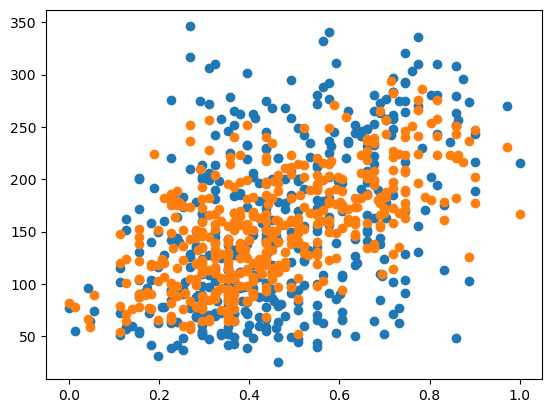

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(df_X[:,3], df_y)
plt.scatter(df_X[:,3], regression_model(df_X,W,b))

plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

## (1) 데이터 가져오기

- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [141]:
wdata = pd.read_csv('../train.csv')

In [142]:
wdata.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.580,19.695,50,26.003,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.760,17.425,57,15.001,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.940,15.910,61,15.001,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.940,17.425,61,6.003,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.120,16.665,66,8.998,4,84,88


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [143]:
wdata['datetime_new'] = pd.to_datetime(wdata['datetime'])
wdata['datetime_new']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime_new, Length: 10886, dtype: datetime64[ns]

In [144]:
#연
wdata['year'] = wdata['datetime_new'].map(lambda x : x.year)
#월
wdata['month'] = wdata['datetime_new'].map(lambda x : x.month)
#일
wdata['day'] = wdata['datetime_new'].map(lambda x : x.day)
#시
wdata['hour'] = wdata['datetime_new'].map(lambda x : x.hour)
#분
wdata['min'] = wdata['datetime_new'].map(lambda x : x.minute)
#초
wdata['sec'] = wdata['datetime_new'].map(lambda x : x.second)

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

In [145]:
time_col = ['year','month','day','hour','min','sec']

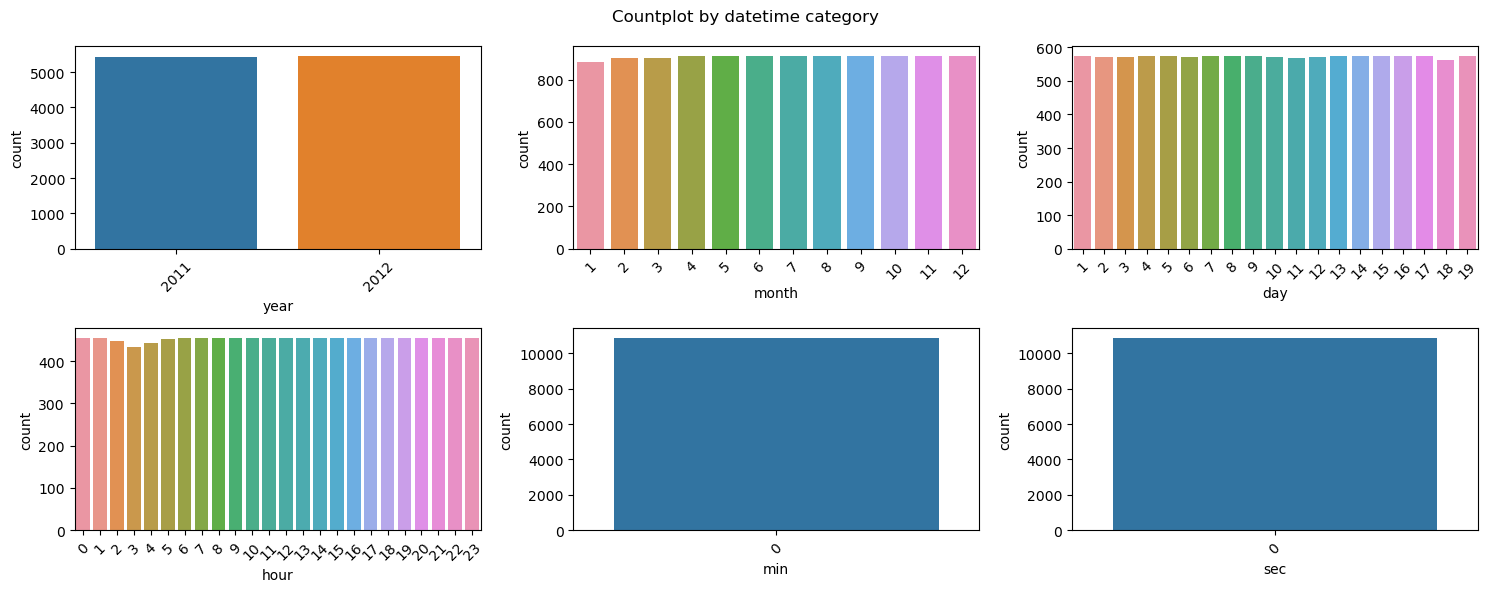

In [146]:
fig = plt.figure(figsize = (15,6))
for i, col in enumerate(time_col) :
    ax = fig.add_subplot(2,3,i+1)
    sns.countplot(data = wdata, x = col)
    plt.xticks(rotation=45)

plt.suptitle('Countplot by datetime category')
plt.tight_layout()
plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

삭제 feature = min, sec
data 

In [156]:
wdata.corr()['count'].sort_values(ascending=False)

count         1.000
registered    0.971
casual        0.690
hour          0.401
temp          0.394
atemp         0.390
year          0.260
month         0.167
season        0.163
windspeed     0.101
day           0.020
workingday    0.012
holiday      -0.005
weather      -0.129
humidity     -0.317
min             NaN
sec             NaN
Name: count, dtype: float64

In [ ]:
fig = plt.figure(figsize = (10,10))
for i, col in enumerate(ddf.columns) :
    ax = fig.add_subplot(6,2,i+1)
    sns.kdeplot(data=ddf,x=col)
plt.tight_layout()
plt.show()    

## (5) LinearRegression 모델 학습

- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [164]:
from sklearn.linear_model import LinearRegression

In [ ]:
linearmodel = LinearRegression()
# linearmodel.fit(X_train, y_train)

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [166]:
from sklearn.metrics import mean_squared_error

In [ ]:
prediction = linearmodel.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5

- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기